# UnitaryHack 2024 Demo Notebook

In [1]:
# Import the necessary libraries
import os
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_ionq import IonQProvider

In [2]:
# Initialize the IonQ provider and backend
api_key = os.getenv("IONQ_API_KEY") or input("Enter your IonQ API key: ")
provider = IonQProvider(token=api_key)
backend = provider.get_backend("simulator", gateset="native")

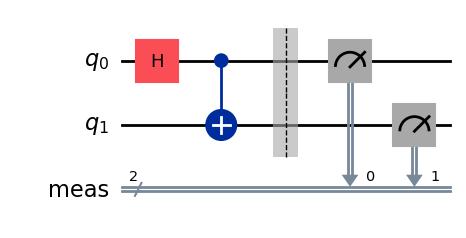

In [3]:
# Define a QIS-gate circuit
qc = QuantumCircuit(2, name="bell state")
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

# Plot the circuit
qc.draw(output="mpl")

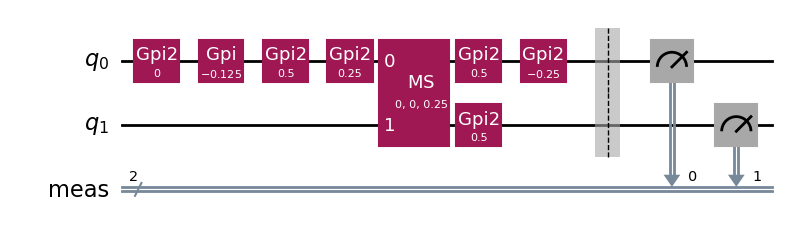

In [4]:
# Transpile the circuit to the native gate set
# Here, you will need to override the Qiskit optimizer
# to use the IonQ optimizer. The goal is to outperform the
# Qiskit optimizer in terms of gate count and circuit depth.
t_qc = transpile(qc, backend=backend, optimization_level=3)

# Plot the transpiled circuit
t_qc.draw(output="mpl")

In [5]:
# Run the circuit
job = backend.run(t_qc, noise_model="aria-1", shots=1000)

{'00': 482, '01': 3, '10': 4, '11': 511}


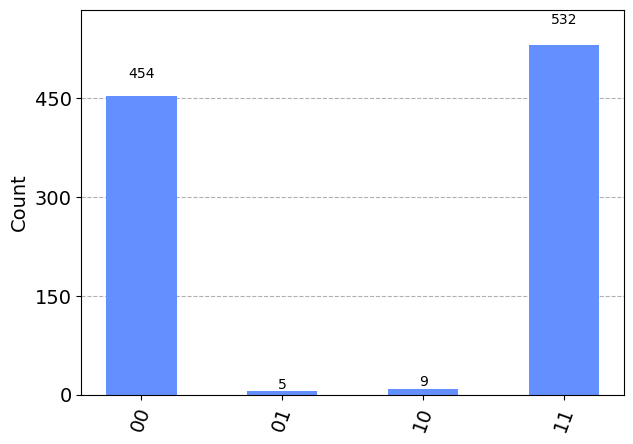

In [6]:
# Get the result
print(job.get_counts())

# Plot the result
plot_histogram(job.get_counts())